In [1]:
import pandas as pd
import seaborn as sns

In [2]:
base = pd.read_csv("Multiple Cause of Death, 1999-2020 Age Gender Year Race COD Socioec.txt", sep='\t', skipfooter=0)

In [3]:
base.describe()

,Notes,Year,Year Code,socioec quintile
count,0.0,121440.000000,121440.000000,121440.000000
mean,NaN,2009.500000,2009.500000,3.000000
std,NaN,6.344315,6.344315,1.414219
min,NaN,1999.000000,1999.000000,1.000000
25%,NaN,2004.000000,2004.000000,2.000000
50%,NaN,2009.500000,2009.500000,3.000000
75%,NaN,2015.000000,2015.000000,4.000000
max,NaN,2020.000000,2020.000000,5.000000


In [4]:
base.head(3)

,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
0,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,< 1 year,1,0,9033,Unreliable,1
1,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,1-4 years,4-Jan,0,38452,Unreliable,1
2,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,5-9 years,9-May,0,56191,Unreliable,1


## Dtypes

In [5]:
base.dtypes

Notes                           float64
Multiple Cause of death          object
Multiple Cause of death Code     object
Year                              int64
Year Code                         int64
Gender                           object
Gender Code                      object
Race                             object
Race Code                        object
Five-Year Age Groups             object
Five-Year Age Groups Code        object
Deaths                           object
Population                       object
Crude Rate                       object
socioec quintile                  int64
dtype: object

<Axes: xlabel='socioec quintile', ylabel='count'>

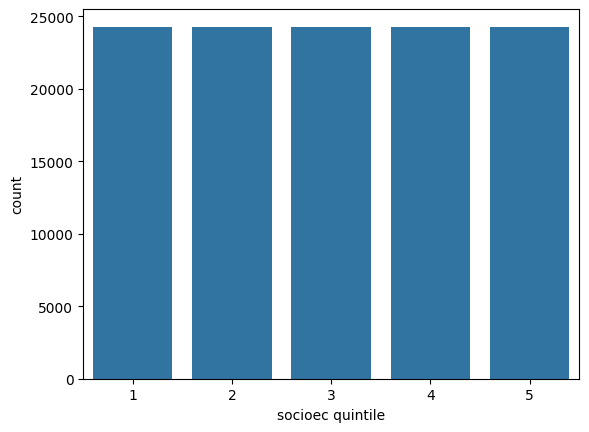

In [6]:
sns.countplot(data=base, x=base["socioec quintile"])

In [7]:
base["Crude Rate"] = pd.to_numeric(base["Crude Rate"], errors='coerce')
base["Deaths"] = pd.to_numeric(base["Deaths"], errors='coerce')

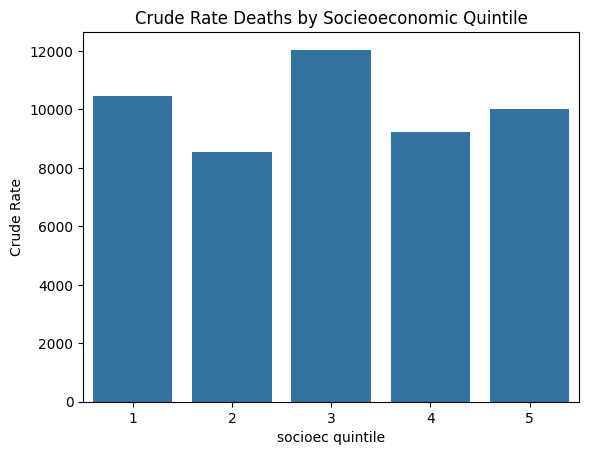

In [8]:
crude_rate_deaths_sum = base.groupby(["socioec quintile"])["Crude Rate"].sum().reset_index()
ax = sns.barplot(data= crude_rate_deaths_sum, 
            x="socioec quintile", y="Crude Rate").set(title="Crude Rate Deaths by Socieoeconomic Quintile")


<Axes: xlabel='socioec quintile', ylabel='Deaths'>

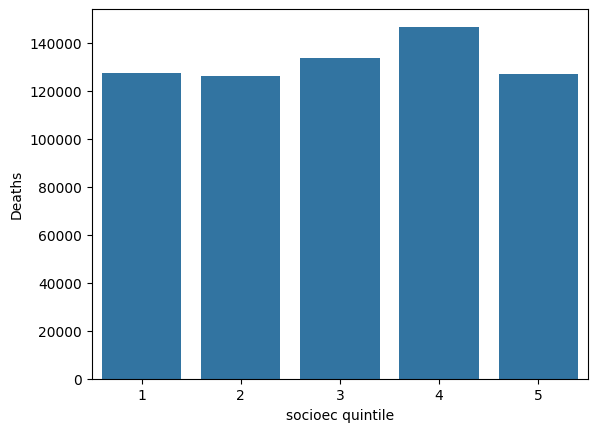

In [9]:
sns.barplot(data=base.groupby(["socioec quintile"])["Deaths"].sum().reset_index(), 
            x="socioec quintile", y="Deaths")

# Duplicates

In [10]:
# There are no complete duplicates in the dataset, based on all columns
print(len(base))
print(len(base.drop_duplicates()))
base.drop_duplicates(inplace=False)

121440
121440


,Notes,Multiple Cause of death,Multiple Cause of death Code,Year,Year Code,Gender,Gender Code,Race,Race Code,Five-Year Age Groups,Five-Year Age Groups Code,Deaths,Population,Crude Rate,socioec quintile
0,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,< 1 year,1,0.0,9033,NaN,1
1,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,1-4 years,4-Jan,0.0,38452,NaN,1
2,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,5-9 years,9-May,0.0,56191,NaN,1
3,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,10-14 years,14-Oct,0.0,56255,NaN,1
4,NaN,Opium,T40.0,1999,1999,Female,F,American Indian or Alaska Native,1002-5,15-19 years,15-19,0.0,51137,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121435,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,85-89 years,85-89,0.0,Not Applicable,NaN,5
121436,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,90-94 years,90-94,NaN,Not Applicable,NaN,5
121437,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,95-99 years,95-99,0.0,Not Applicable,NaN,5
121438,NaN,Other and unspecified narcotics,T40.6,2020,2020,Male,M,White,2106-3,100+ years,100+,0.0,Not Applicable,NaN,5


## Outliers

Typically, something like the below, but this dataset is relatively trustworthy

```python
# calculate IQR for column A
Q1 = base['Deaths'].quantile(0.25)
Q3 = base['Deaths'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_deaths = base[(base['Deaths'] < Q1 - threshold * IQR) | (base['Deaths'] > Q3 + threshold * IQR)]
```

Running the above returns many outliers: about 10% of the dataset

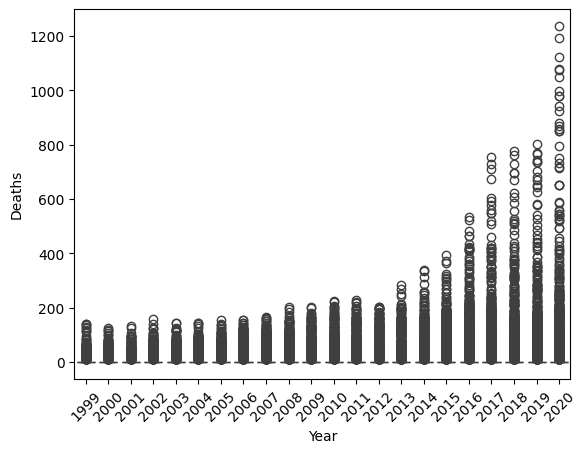

In [11]:
b_d_y = sns.boxplot(data=base, y="Deaths", x="Year")
for item in b_d_y.get_xticklabels():
    item.set_rotation(45)

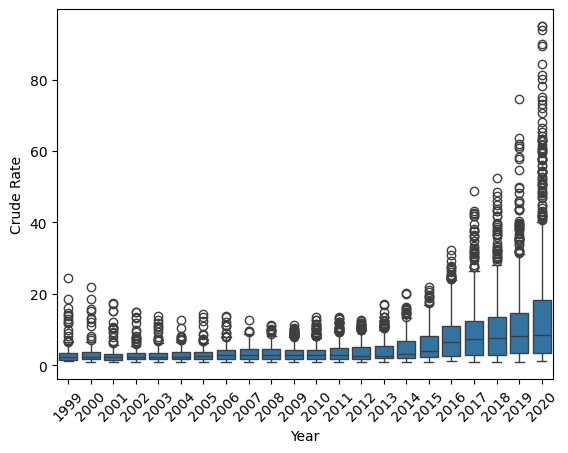

In [12]:
b_c_y = sns.boxplot(data=base, y="Crude Rate", x="Year")
for item in b_c_y.get_xticklabels():
    item.set_rotation(45)

<Axes: xlabel='socioec quintile', ylabel='Deaths'>

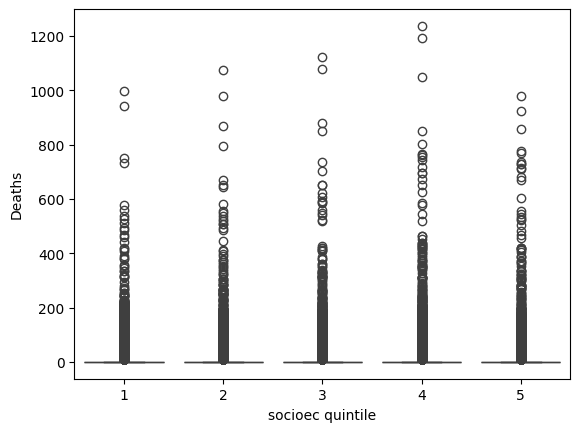

In [13]:
sns.boxplot(data=base, y="Deaths", x="socioec quintile")

<Axes: xlabel='socioec quintile', ylabel='Crude Rate'>

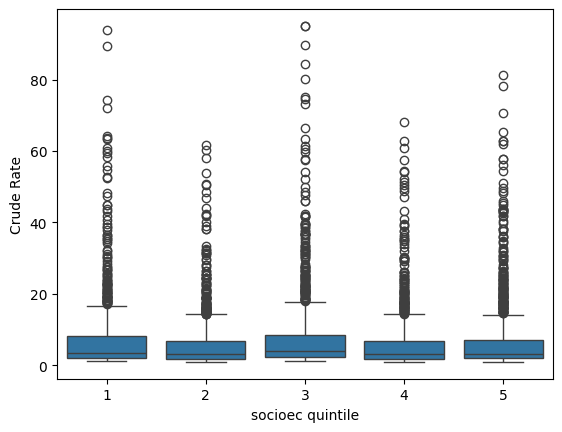

In [14]:
sns.boxplot(data=base, y="Crude Rate", x="socioec quintile")

In [15]:
# calculate IQR for column A
Q1 = base['Deaths'].quantile(0.25)
Q3 = base['Deaths'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_deaths = base[(base['Deaths'] < Q1 - threshold * IQR) | (base['Deaths'] > Q3 + threshold * IQR)]

In [16]:
print((len(outliers_deaths)/len(base))*100)

9.253129117259553


In [17]:
# calculate IQR for column A
Q1 = base['Crude Rate'].quantile(0.25)
Q3 = base['Crude Rate'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers_crude_rate = base[(base['Crude Rate'] < Q1 - threshold * IQR) | (base['Crude Rate'] > Q3 + threshold * IQR)]

In [18]:
print((len(outliers_crude_rate)/len(base))*100)

0.4940711462450593


## Missing Data

Fill in missing data with group averages to keep data continuous 

In [31]:
field = []
count_nulls = []
percent_nulls = []
for (value, column) in zip(base.isnull().sum(), base.isnull().columns):
    field.append(column)
    count_nulls.append(value)
    percent_nulls.append(value/len(base))

pd.DataFrame(zip(field, count_nulls, percent_nulls), columns = ["Field", "Count of Nulls", "Percent of Total"])

,Field,Count of Nulls,Percent of Total
0,Notes,121440,1.000000
1,Multiple Cause of death,0,0.000000
2,Multiple Cause of death Code,0,0.000000
3,Year,0,0.000000
4,Year Code,0,0.000000
5,Gender,0,0.000000
6,Gender Code,0,0.000000
7,Race,0,0.000000
8,Race Code,0,0.000000
9,Five-Year Age Groups,0,0.000000
